In [25]:
%matplotlib notebook
%matplotlib inline

In [26]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [27]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [29]:
date = datetime.strftime(datetime.now(), "%m/%d/%Y")

In [30]:
target_user = "FoxNews"
target_users = ("FoxNews", "CNN", "CBS", "nytimes", "BBC")

sentiments = {"compound_FoxNews": [],
              "tweet_ago_FoxNews": [],
              "compound_CNN": [],
              "tweet_ago_CNN": [],
              "compound_CBS": [],
              "tweet_ago_CBS": [],
              "compound_nytimes": [],
              "tweet_ago_nytimes": [],
              "compound_BBC": [],
              "tweet_ago_BBC": []}

for target_user in target_users:
    
    public_tweets = [] 

    for page_num in range(1, 3):
        tweets = api.user_timeline(target_user, page=page_num, type='recent')
        public_tweets += tweets
        
    number_of_tweets = len(public_tweets)
    
    for num in range(number_of_tweets):
    
        # Get tweet and previous tweet
        tweet = public_tweets[num]
        tweet_time = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
       
        # Calculate the time between the two tweets
        if num == (number_of_tweets - 1): # for the last tweet
            tweet_ago = 0 
        else:
            previous_tweet = public_tweets[num+1]
            previous_tweet_time = datetime.strptime(previous_tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
            tweet_ago = round((tweet_time - previous_tweet_time).seconds/60, 2)
        
        # Run Vader Analysis on tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]

        # Add each value to the sentiments
        sentiments[f"compound_{target_user}"].append(compound)
        sentiments[f"tweet_ago_{target_user}"].append(tweet_ago)

print("done")    

done


In [31]:
sentiments_df = pd.DataFrame(sentiments)

In [32]:
sentiments_df

,compound_FoxNews,tweet_ago_FoxNews,compound_CNN,tweet_ago_CNN,compound_CBS,tweet_ago_CBS,compound_nytimes,tweet_ago_nytimes,compound_BBC,tweet_ago_BBC
0,0.0000,7.00,0.2732,14.92,0.0000,125.78,0.4939,17.08,0.4215,209.85
1,0.0000,7.00,0.3612,15.08,0.0000,143.55,0.0000,17.33,0.4215,61.08
2,0.0000,7.00,0.0000,14.97,0.0000,60.85,-0.6486,17.47,-0.7003,6.48
3,-0.2960,7.00,0.4588,15.03,0.0000,1232.53,-0.0516,16.03,0.5499,52.57
4,0.5106,7.00,0.0000,15.00,0.0000,17.42,0.0000,17.55,0.7088,58.95
5,0.0000,7.00,0.0000,14.93,0.0000,162.62,0.0000,19.12,0.0000,62.00
6,0.0000,7.00,-0.2732,30.68,0.0000,21.13,0.2960,17.93,-0.5256,118.08
7,-0.4588,7.00,0.0000,30.28,-0.3400,973.92,-0.2732,6.02,-0.1860,59.95
8,-0.4131,8.00,0.0000,27.68,0.0000,1.97,0.0000,17.58,0.4939,62.05
9,-0.2960,7.00,-0.1779,32.20,0.0000,172.80,-0.2960,17.03,-0.5267,49.27


In [33]:
sentiments_df.shape

(40, 10)

In [34]:
datetime.strftime(datetime.now(), "%m/%d/%Y")

'09/29/2018'

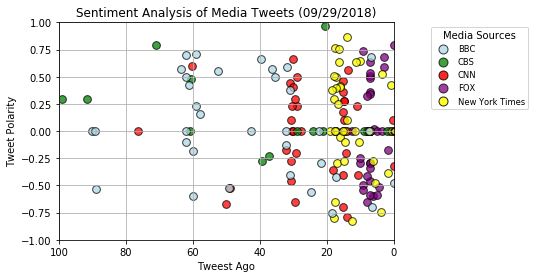

In [52]:
plt.xlim(100, 0)
plt.ylim(-1, 1)
x_axis = [100, 0]
y_axis = [-1, 1]
plt.grid(True)

plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.xlabel("Tweest Ago")
plt.ylabel("Tweet Polarity")

target_users_with_colors = {"FoxNews": "purple", "CNN": "red", "CBS": "green", "nytimes": "yellow", "BBC": "lightblue"}

for key, value in target_users_with_colors.items():
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"compound_{key}"], facecolors=value, edgecolors="black",
            s=60, alpha=0.75, label=f"{key}")
    
# Create dummy objects for legend
h1 = plt.scatter([-0.1], [0], marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, label="BBC")
h2 = plt.scatter([-0.1], [0], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
h3 = plt.scatter([-0.1], [0], marker="o", facecolors="red", edgecolors="black", alpha=0.85, label="CNN")
h4 = plt.scatter([-0.1], [0], marker="o", facecolors="purple", edgecolors="black", alpha=0.75, label="FOX")
h5 = plt.scatter([-0.1], [0], marker="o", facecolors="yellow", edgecolors="black", alpha=0.85, label="New York Times")
# Set legend
legend = plt.legend(handles=[h1, h2, h3, h4, h5], markerscale=1.5, title="Media Sources", bbox_to_anchor=(1.1, 1), fontsize='small', fancybox=True)

